The Boston housing dataset contains 506 observations and 14 variables. The dataset contains missing values.
The dataset can be found here:

https://www.kaggle.com/tolgahancepel/boston-housing-regression-analysis

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000'


In [ ]:
Importing the libraries

In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib
import pylab as plt
from sklearn.model_selection import StratifiedShuffleSplit

import seaborn as sns


In [5]:
data=pd.read_csv("HousingData.csv")


In [6]:
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [7]:
random.seed(42)
boston = data.reindex(np.random.permutation(data.index))
boston.reset_index(inplace = True ,drop =True )
boston


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
2,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53,29.6
3,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11,44.0
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06127,40.0,6.41,1.0,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,NaN,33.1
502,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
503,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58,23.1
504,NaN,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5


In [8]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
X = boston.drop('MEDV', axis = 1)
Y = boston['MEDV']
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
2,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53
3,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06127,40.0,6.41,1.0,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,NaN
502,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
503,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
504,NaN,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64


In [11]:
Y = pd.DataFrame(Y)
Y


,MEDV
0,50.0
1,32.4
2,29.6
3,44.0
4,10.4
...,...
501,33.1
502,12.1
503,23.1
504,14.5


Accounting for inflation:

**CORRELATION MATRIX**

In [13]:
correlation_matrix = boston.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


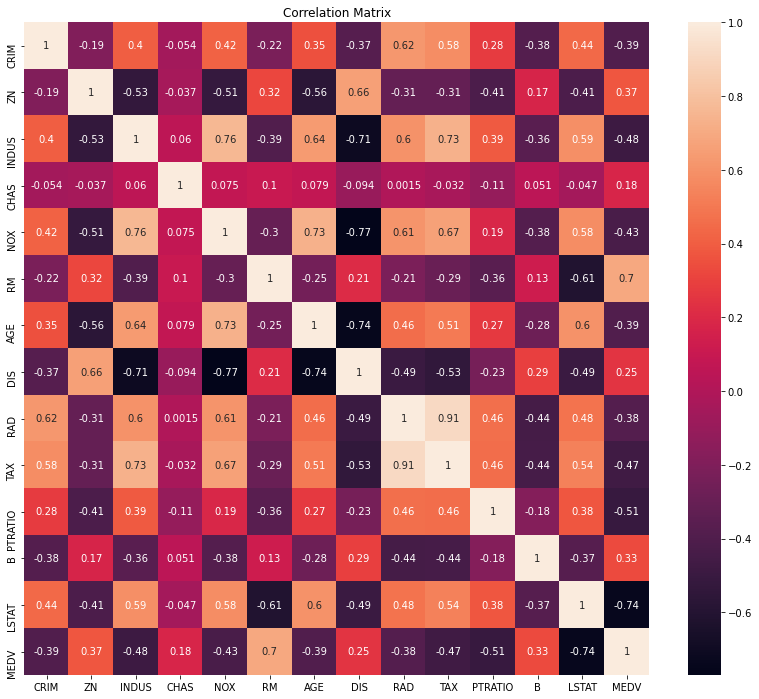

In [14]:
plt.figure(figsize=(14,12))
plt.title("Correlation Matrix")
sns.heatmap(data = correlation_matrix, annot=True)


Clearly RAD AND TAX have the highest positive correlation followed by TAX and INDUS.
NOX and DIS have the highest negative coorelation.

Here,
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
INDUS - proportion of non-retail business acres per town.

That means that rate of accelability and tax rate have highest positive coorelation i.e. if the a property is highly accelable with highly ,the tax rate of those houses is high
The taxes are high in the areas where there arenon-retail business like doctor's office, hospitals, schools, universities

Here,
NOX - nitric oxides concentration (parts per 10 million)
DIS - weighted distances to five Boston employment centres

Wherever there is a high level on nitric oxide concentration in air, the distance to the emplyment center is less.

In [15]:
correlation_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

Also, looking at coorelation matrix, I understand that we need select a few features.

In terms of correlation_matrix the features which are at least 0.5 correlated with the output variable. These are PRATIO, LSTAT, and RM

Also performing feature engineering will help but it can only be done once we have the test-traing data split.

**Are there any missing values in X_train**

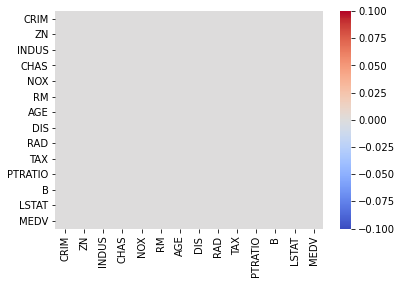

In [23]:
sns.heatmap(correlation_matrix.isnull() , cmap="coolwarm")

There is no need to perform any imputation

**SCATTERPLOT**

Relationship between Crime rate and price of houses

Text(0, 0.5, 'Value of the homes in $1000')

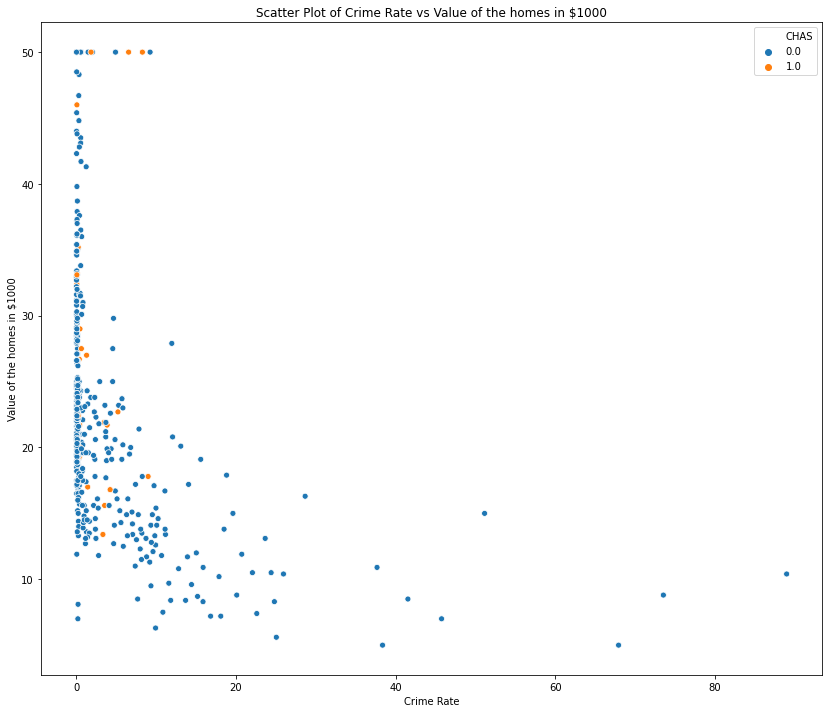

In [24]:
plt.figure(figsize=(14,12))
plt.title("Scatter Plot of Crime Rate vs Value of the homes in $1000")
sns.scatterplot(x='CRIM', y="MEDV", hue ='CHAS', data=boston)
plt.xlabel("Crime Rate")
plt.ylabel("Value of the homes in $1000")

Whever crime rate is low, there the value of houses is high. Also, additing CHAS, Charles River dummy variable adds no value to data.

Relationship between Crime rate and price of houses

Text(0, 0.5, 'Value of the homes in $1000')

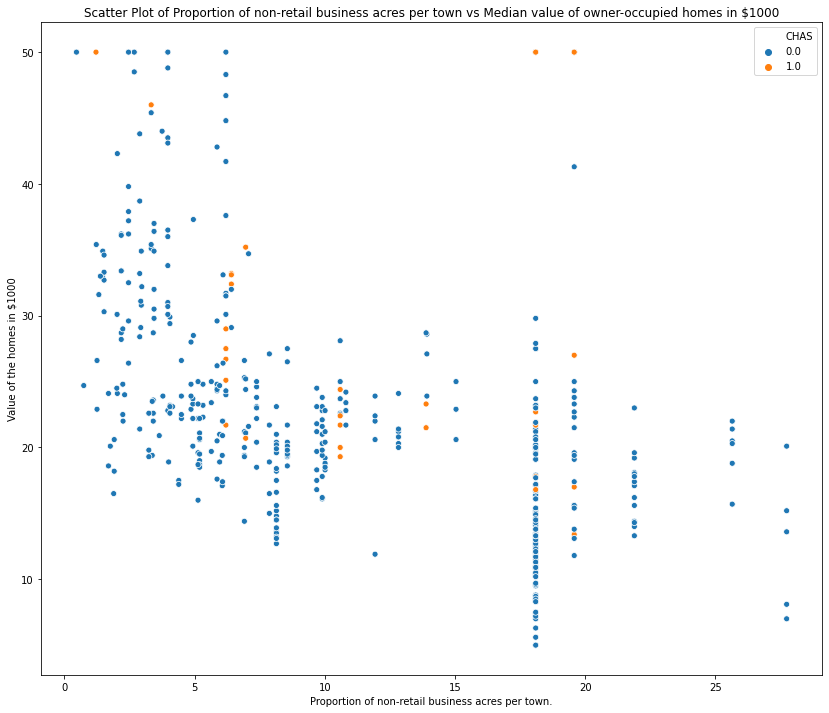

In [25]:
plt.figure(figsize=(14,12))
plt.title("Scatter Plot of Proportion of non-retail business acres per town vs Median value of owner-occupied homes in $1000")
sns.scatterplot(x='INDUS', y="MEDV", hue ='CHAS', data=boston)
plt.xlabel("Proportion of non-retail business acres per town.")
plt.ylabel("Value of the homes in $1000")

Some houses are very expensive even with a presence of few non-retail business near them. This may be because they
may be unversity in the area or a popular schools in that area.

After a certain level after increasing the non-retail business has no effect on the prices of the houses in that area.


Relationship between taxes and ages of houses

Text(0, 0.5, 'Taxes paid by houses')

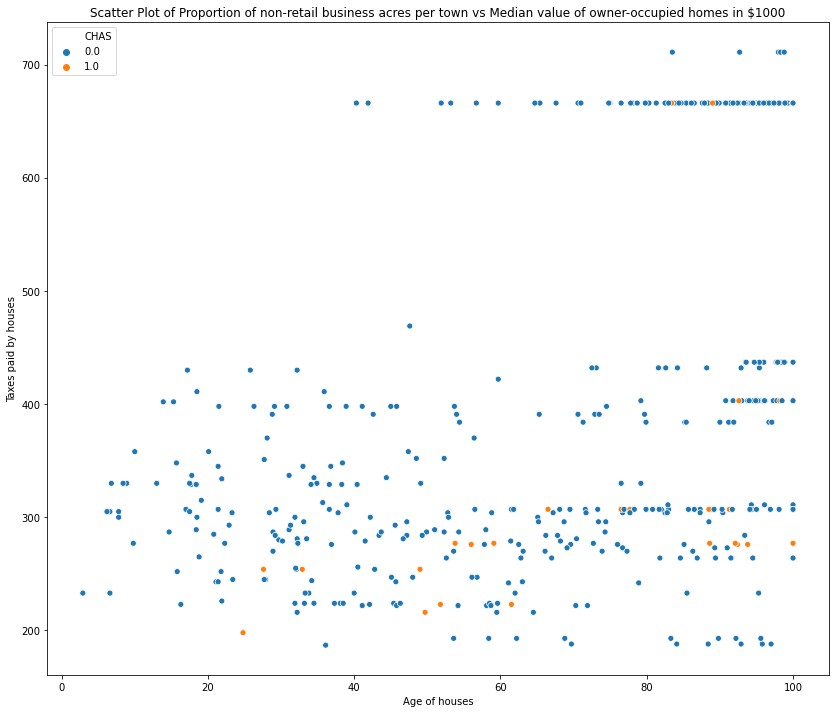

In [26]:
plt.figure(figsize=(14,12))
plt.title("Scatter Plot of Proportion of non-retail business acres per town vs Median value of owner-occupied homes in $1000")
sns.scatterplot(x='AGE', y="TAX", hue ='CHAS', data=boston)
plt.xlabel("Age of houses")
plt.ylabel("Taxes paid by houses")

Age of houses has not to do with taxes paid for those houses.
However, it does seem that there may be some very expensive houses who pay a lot of taxes.

Relationship between room and price

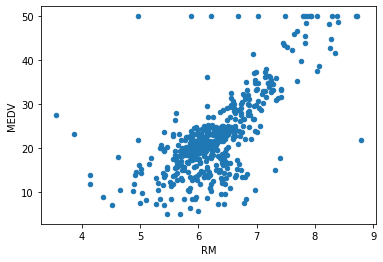

In [27]:
boston.plot(kind = 'scatter'  , x = 'RM' , y = 'MEDV')

As the number of rooms increase in houses, then the prices of houses increase.

**BOXPLOT**

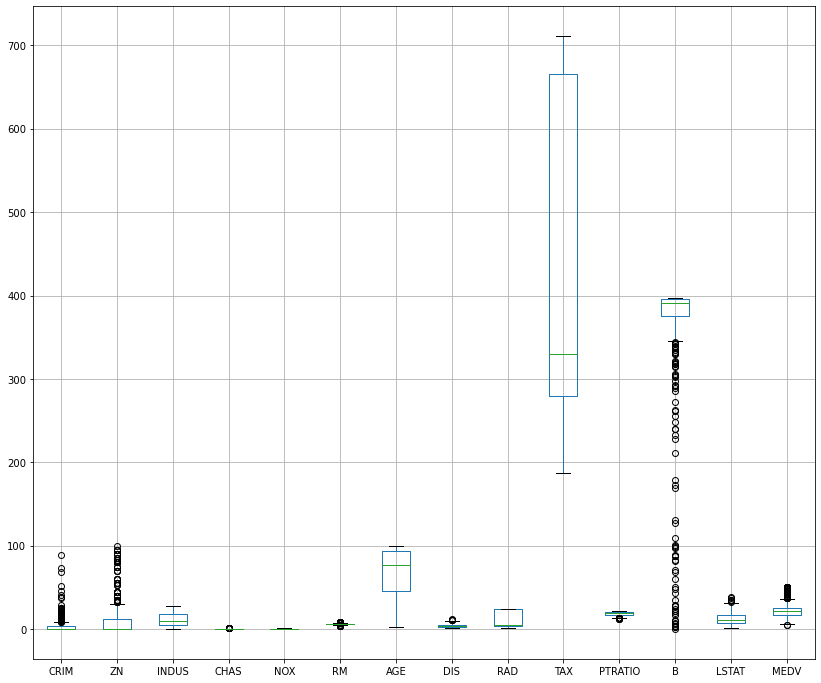

In [28]:
plt.figure(figsize=(14,12))
boston.boxplot()


Looking at boxplot I know we need to address the issue of outliers and remove them.

PAIRPLOT

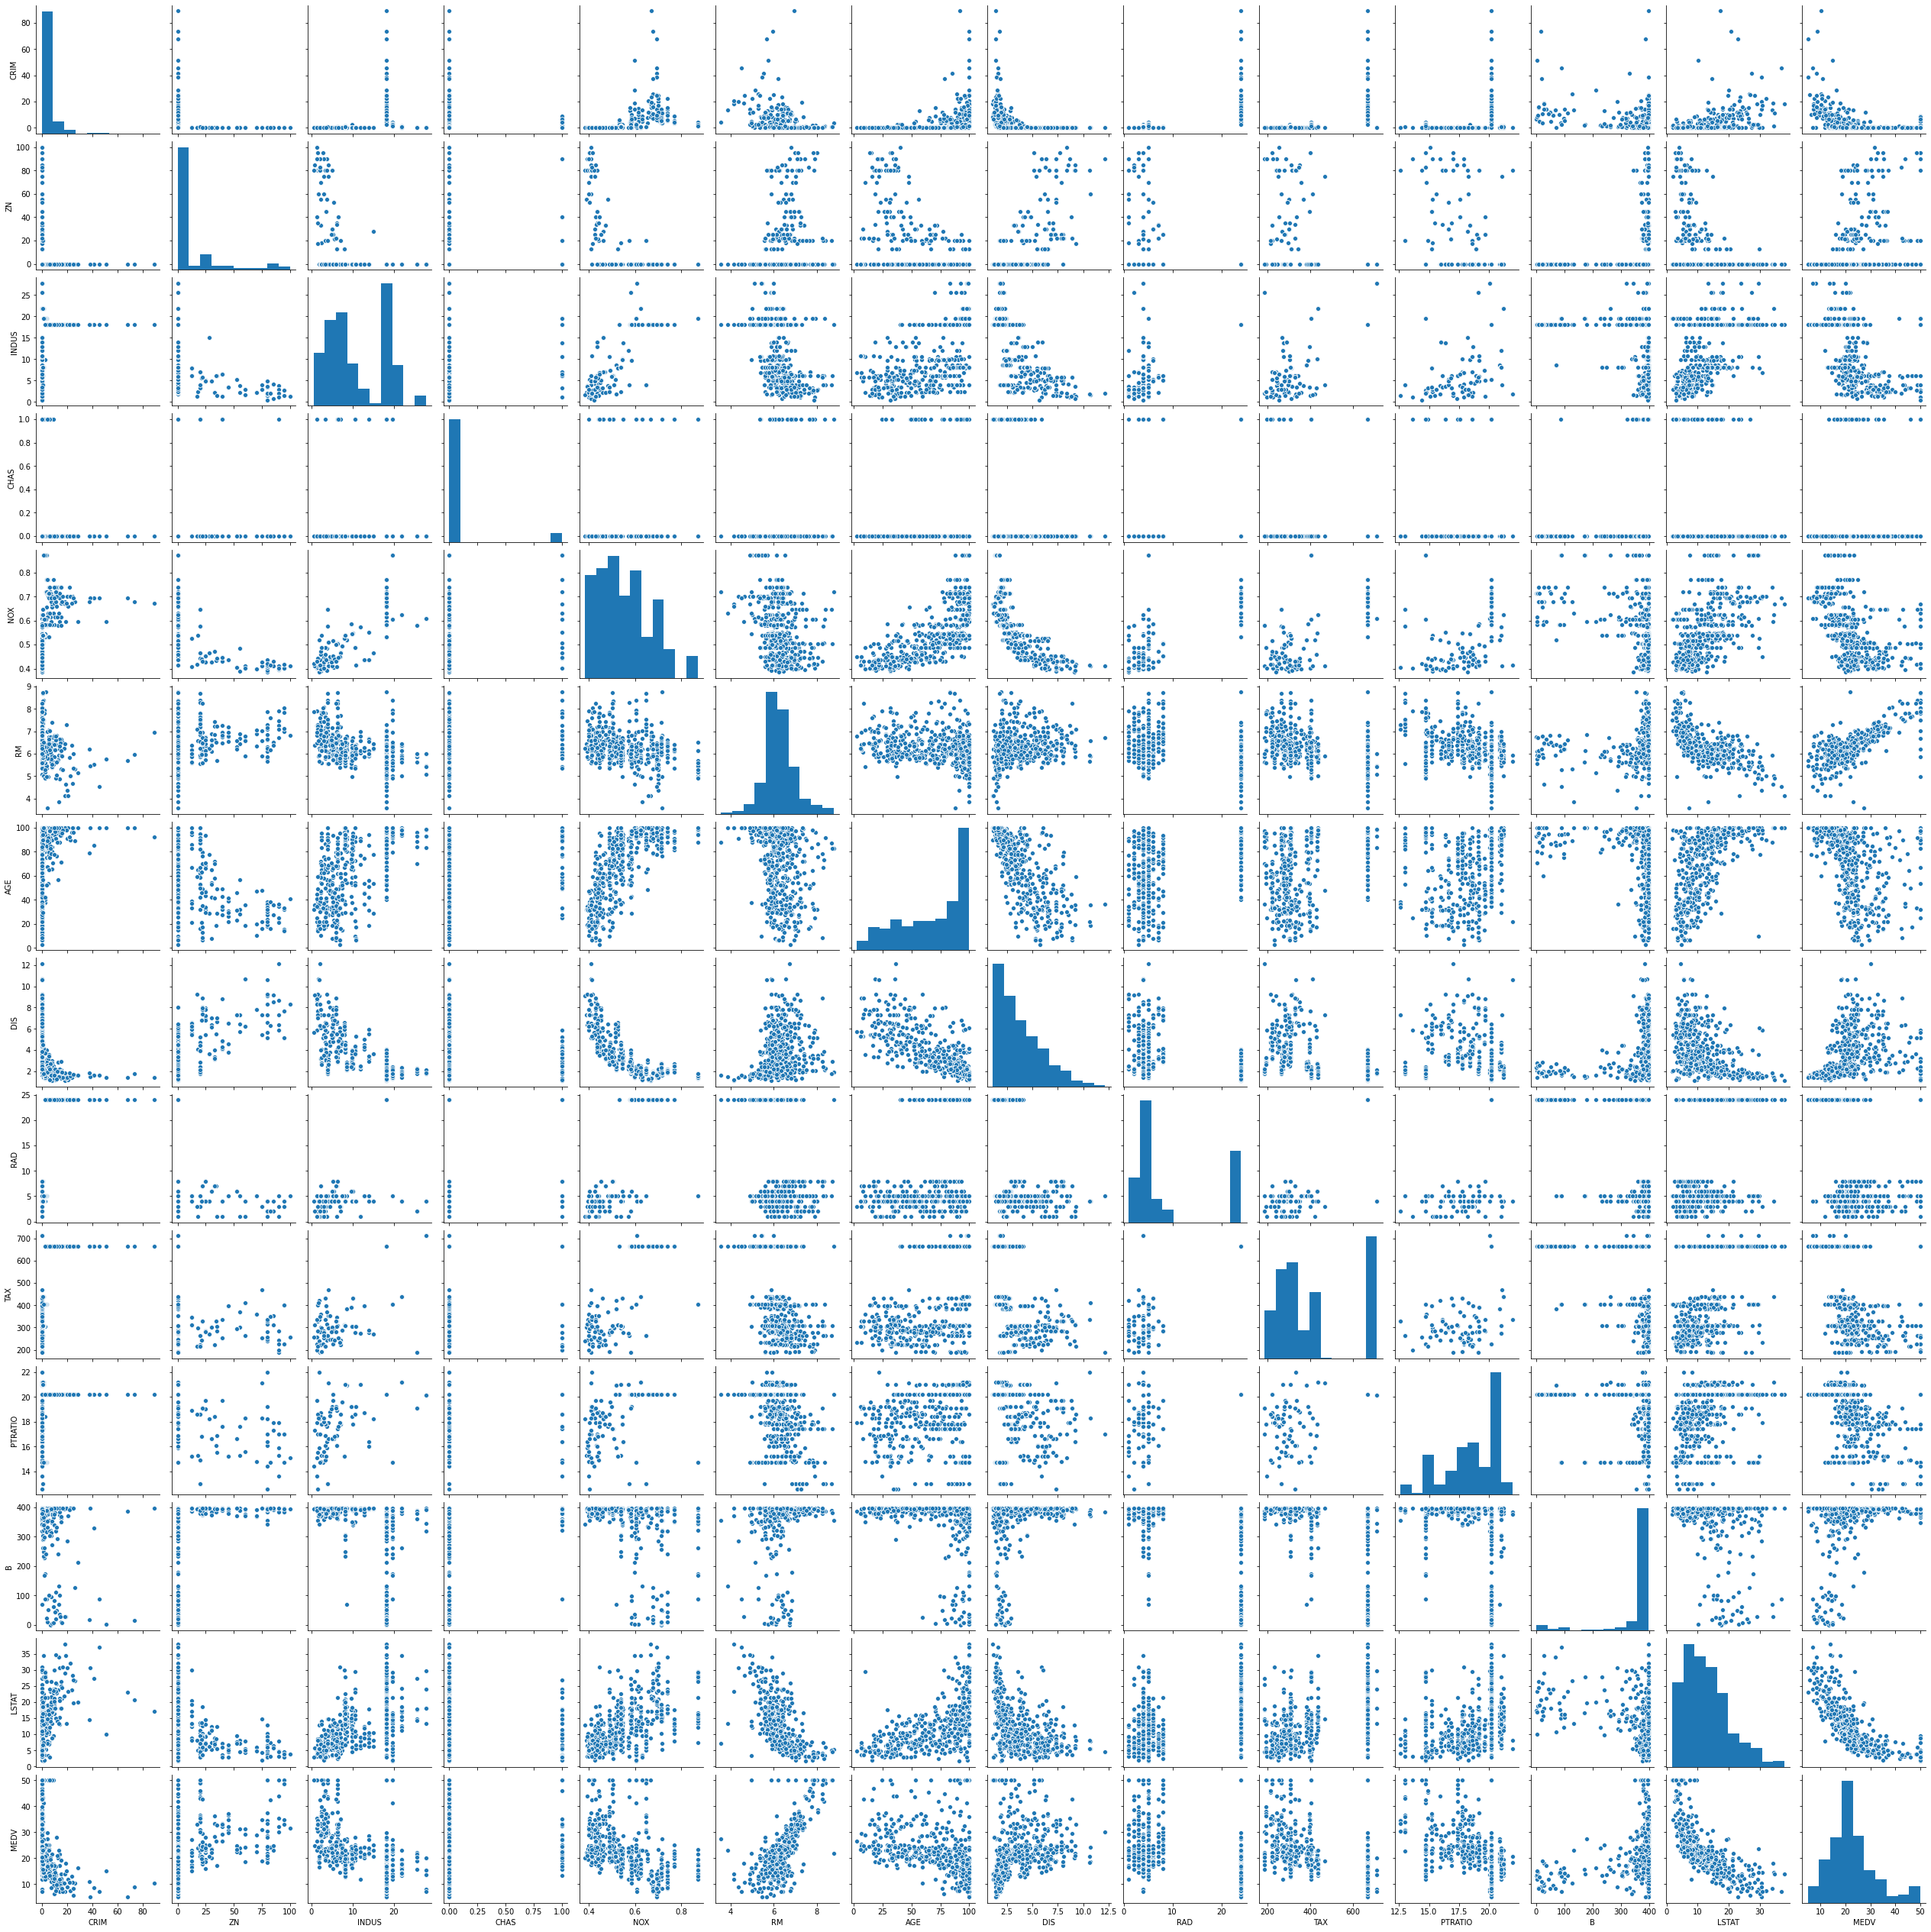

In [29]:
sns.pairplot(boston)
plt.show()

There is too much data that is hard to read.

HISTOGRAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126466df0>,
      dtype=object)

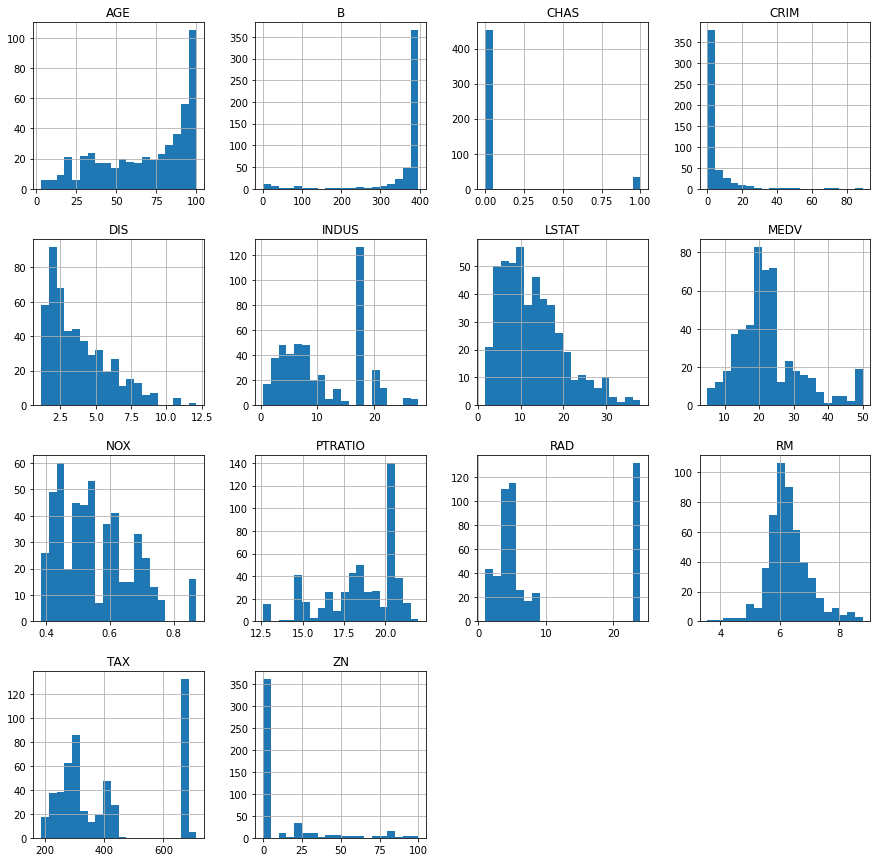

In [31]:
boston.hist(bins=20,figsize=(15,15))

- The frequency of the age of 100 is high.
- The frequency of proportion of blacks by town of 400 is high.
- Most houses have 6 rooms.
- Very few proportion of residential land zoned for lots over 25,000 sq.ft.
- Most people pay property-tax rate of approximately $650 per $10,000.
- PT ratio ie.e pupil to teacher ratio of 22 is most common.
- The most common NOX ratio is 0.42, followed by 0.48 and that followed by 0.6.
- Most houses have a median price of 20,000$.
- Most houses are at a weighted distance of 2 to five Boston employment centres

In [ ]:
DISPLOT

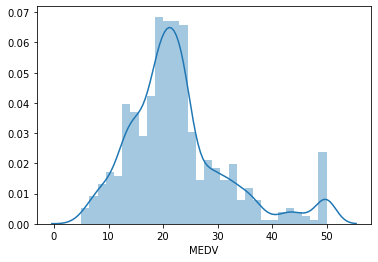

In [32]:
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [ ]:
Similar to histogram, we conclude that most houses have a median price of 20,000$.

In [ ]:
AFTER VISUALIZATIONS WE MOVE TO PREPROCESSING THE DATA

In [ ]:
OUTLIERS

In [ ]:
As we saw in the boxplot the outliers need to be handled.

In [33]:
def outlier_remove(df, n,name):
    """Delete rows for a specified column where values are out of +/- n*sd standard deviations
    df  : Pandas dataframe
    n   : n in the equation 𝑚±𝑛𝜎
    name: Column name
    """
    mean=df[name].mean() # Calclute mean of column
    sd=df[name].std()    # Calclute standard deviation of column
    drop_r = df.index[(mean -n * sd> df[name]) | (mean+n * sd< df[name])]# vertical line is or
    df.drop(drop_r, axis=0, inplace=True)# dropping rows that dont satisfy the code
    df.reset_index(inplace=True, drop=True) # Reset index

# Drop outliers in last column 'OIL Prod. (e3m3/month)'
outlier_remove(boston, n=2.5,name='MEDV') #based on oil production
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,467.000000,466.000000,465.000000,465.000000,485.000000,485.000000,468.000000,485.000000,485.000000,485.000000,485.000000,485.000000,466.000000,485.000000
mean,3.676788,10.748927,11.128323,0.058065,0.554832,6.227736,68.504915,3.833544,9.550515,409.490722,18.551340,355.579381,13.075837,21.367629
std,8.871251,22.643408,6.794161,0.234117,0.116892,0.631799,27.951685,2.117806,8.727037,168.239015,2.091359,93.069201,7.075446,7.444522
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.879000,45.325000,2.109900,4.000000,281.000000,17.400000,375.210000,7.457500,16.600000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.176000,76.700000,3.272100,5.000000,330.000000,19.100000,391.930000,11.995000,20.800000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.563000,93.925000,5.231100,24.000000,666.000000,20.200000,396.420000,17.142500,24.500000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,45.400000


In [ ]:
Since the number of rows has been reduced ie.e outliers have been removed.

In [34]:
X = boston.drop('MEDV', axis = 1)
Y = boston['MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
1,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53
2,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11
3,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
4,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.06127,40.0,6.41,1.0,0.447,6.826,27.6,4.8628,4,254,17.6,393.45,NaN
481,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
482,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
483,NaN,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64


In [35]:
Y = pd.DataFrame(Y)
Y


,MEDV
0,32.4
1,29.6
2,44.0
3,10.4
4,15.2
...,...
480,33.1
481,12.1
482,23.1
483,14.5


Accounting for inflation

The formula used for inflation is as follows; Today's value = CPI today/CPI in 1978× USD value in 1978

In [36]:
Y_inflated = 260.229/65.2 * Y
Y_inflated

,MEDV
0,129.316252
1,118.140773
2,175.614663
3,41.508920
4,60.666883
...,...
480,132.110121
481,48.294032
482,92.197698
483,57.873014


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,Y_inflated, test_size = 0.2)

In [38]:
X_train.shape

(388, 13)

In [39]:
X_test.shape

(97, 13)

IMPUTATION 

When I try to compute further I am getting the following error message:
    Input contains NaN, infinity or a value too large for dtype('float32').
So imputation needs to be perormed

In [ ]:
Imputation methods:
    - Delete rows where there are Nan values. It is not the recommended, plus i cant find any NaN in this dataset.
    - Impute with mean values
    - Impute with median values
    - Imputation Using (Most Frequent) 
    - Imputation Using k-NN

IMPUTING WITH MEAN

In [136]:
from sklearn.impute import SimpleImputer

imput_mdn = SimpleImputer(strategy="mean") 
imput_mdn.fit(X_train)

im = imput_mdn.transform(X_train)
X_train_im = pd.DataFrame(im, columns=X_train.columns)
X_train_im.shape


(388, 13)

In [137]:
y_train.shape

(388, 1)

In [138]:
im_test = imput_mdn.transform(X_test)
X_test_im = pd.DataFrame(im_test, columns=X_test.columns)
X_test_im.shape

(97, 13)

In [139]:
y_test.shape

(97, 1)

In [140]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 42, n_estimators=700)
model.fit(X_train_im, y_train)
predictionforest = model.predict(X_test_im)

from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test ,predictionforest , squared=False)
print('mean_squared_error of linear regression is' , mean_squared_error)

from sklearn.metrics import r2_score
r2_score_error = r2_score(y_test ,predictionforest)
print('mean_squared_error of linear regression is' , r2_score_error)

mean_squared_error of linear regression is 12.423742599412606
mean_squared_error of linear regression is 0.8114274319573183


IMPUTING WITH MEDIAN

In [ ]:
from sklearn.impute import SimpleImputer

imput_mdn = SimpleImputer(strategy="median") 
imput_mdn.fit(X_train)

im = imput_mdn.transform(X_train)
X_train_im = pd.DataFrame(im, columns=X_train.columns)
X_train_im.shape

In [ ]:
im_test = imput_mdn.transform(X_test)
X_test_im = pd.DataFrame(im_test, columns=X_test.columns)
X_test_im.shape

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 42, n_estimators=700)
model.fit(X_train_im, y_train)
predictionforest = model.predict(X_test_im)

from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test ,predictionforest , squared=False)
print('mean_squared_error of linear regression is' , mean_squared_error)

from sklearn.metrics import r2_score
r2_score_error = r2_score(y_test ,predictionforest)
print('mean_squared_error of linear regression is' , r2_score_error)

IMPUTATION WITH MOST FREQUENT

In [143]:
from sklearn.impute import SimpleImputer
imp_mdn = SimpleImputer(strategy='most_frequent')

imput_mdn.fit(X_train)

im = imput_mdn.transform(X_train)
X_train_im_mf = pd.DataFrame(im, columns=X_train.columns)
X_train_im_mf.shape

(388, 13)

In [144]:
im_test = imput_mdn.transform(X_test)
X_test_im_mf = pd.DataFrame(im_test, columns=X_test.columns)
X_test_im_mf.shape

(97, 13)

In [145]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 42, n_estimators=700)
model.fit(X_train_im_mf, y_train)
predictionforest = model.predict(X_test_im_mf)

from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test ,predictionforest , squared=False)
print('mean_squared_error of linear regression is' , mean_squared_error)

from sklearn.metrics import r2_score
r2_score_error = r2_score(y_test ,predictionforest)
print('mean_squared_error of linear regression is' , r2_score_error)

mean_squared_error of linear regression is 12.423742599412606
mean_squared_error of linear regression is 0.8114274319573183


IMPUTATION AT kNN


In [ ]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
X_train_im_knn=fast_knn(X_train.values, k=30)
X_train_im_knn.shape


In [147]:
im_test = fast_knn(X_test.values)
X_test_im_knn = pd.DataFrame(im_test, columns=X_test.columns)
X_test_im_knn.shape


(97, 13)

In [148]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 42, n_estimators=700)
model.fit(X_train_im_knn, y_train)
predictionforest = model.predict(X_test_im_knn)

from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test ,predictionforest , squared=False)
print('mean_squared_error of linear regression is' , mean_squared_error)

from sklearn.metrics import r2_score
r2_score_error = r2_score(y_test ,predictionforest)
print('mean_squared_error of linear regression is' , r2_score_error)

mean_squared_error of linear regression is 12.36367829993062
mean_squared_error of linear regression is 0.8132463845630361


The knn is the best method, hence it has been used for imputation.


In [ ]:
FEATURE ENGINEERING


In [133]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 42, n_estimators=700)
model.fit(X_train_im_knn, y_train)
predictionforest = model.predict(X_test_im_knn)

from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y_test ,predictionforest , squared=False)
print('mean_squared_error of linear regression is' , mean_squared_error)

from sklearn.metrics import r2_score
r2_score_error = r2_score(y_test ,predictionforest)
print('mean_squared_error of linear regression is' , r2_score_error)

mean_squared_error of linear regression is 12.36367829993062
mean_squared_error of linear regression is 0.8132463845630361


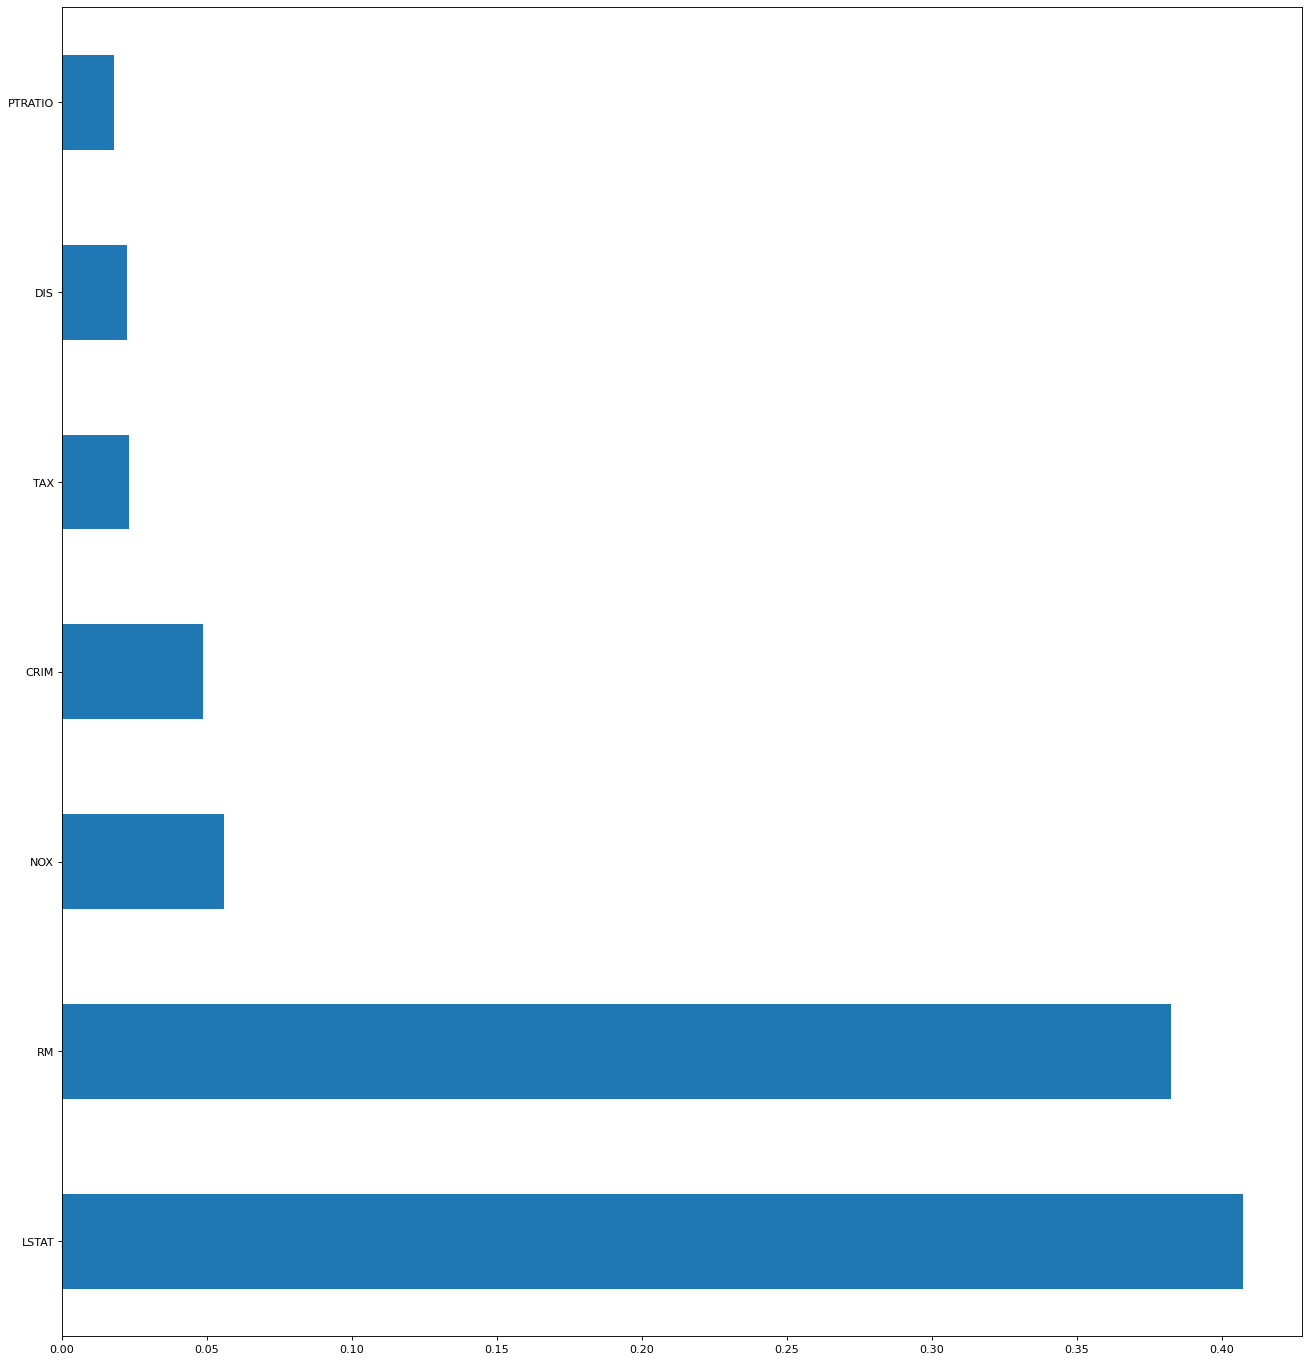

In [47]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')


The top 2 features are LSTAT, and RM.In terms of correlation_matrix the features which are at least 0.5 correlated with the output variable. These are PTRATIO, LSTAT, and RM

In [48]:
X_train_im_knn


array([[1.54450e-01, 2.50000e+01, 5.13000e+00, ..., 1.97000e+01,
        3.90680e+02, 6.86000e+00],
       [1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [7.52601e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.04210e+02, 1.93100e+01],
       ...,
       [9.51363e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        6.68000e+00, 1.87100e+01],
       [5.64400e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.96900e+02, 3.53000e+00],
       [5.02300e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.94020e+02, 1.24300e+01]])

In [49]:
X_train_updated = pd.DataFrame(X_train_im_knn, columns=X_train.columns)
X_train_updated


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.154450,25.0,5.13,0.0,0.4530,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
1,1.232470,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
2,7.526010,0.0,18.10,0.0,0.7130,6.417,98.3,2.1850,24.0,666.0,20.2,304.21,19.31
3,0.115875,21.0,5.64,0.0,0.4390,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
4,1.002450,0.0,8.14,0.0,0.5380,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,5.824010,0.0,18.10,0.0,0.5320,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74
384,3.673670,0.0,18.10,0.0,0.5830,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58
385,9.513630,0.0,18.10,0.0,0.7130,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71
386,0.056440,40.0,6.41,1.0,0.4470,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53


In [50]:
X_test_updated = pd.DataFrame(X_test_im_knn, columns=X_test.columns)
X_test_updated


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.22358,0.000000,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
1,0.09604,40.000000,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
2,5.82115,0.000000,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
3,1.19294,0.000000,21.89,0.0,0.624,6.326,97.7,2.2710,4.0,437.0,21.2,396.90,12.26
4,0.13642,8.485696,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,11.16040,0.000000,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
93,0.10574,0.000000,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
94,1.05393,0.000000,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
95,0.14030,22.000000,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90


In [51]:
X_train_new = X_train_updated[['RM','LSTAT','PTRATIO']]
X_train_new     


,RM,LSTAT,PTRATIO
0,6.145,6.86,19.7
1,6.142,18.72,21.0
2,6.417,19.31,20.2
3,5.998,8.43,16.8
4,6.674,11.98,21.0
...,...,...,...
383,6.242,10.74,20.2
384,6.312,10.58,20.2
385,6.728,18.71,20.2
386,6.758,3.53,17.6


In [52]:
X_test_new = X_test_updated[['RM','LSTAT','PTRATIO']]
X_test_new


,RM,LSTAT,PTRATIO
0,6.943,4.59,14.7
1,6.854,2.98,17.6
2,6.513,10.29,20.2
3,6.326,12.26,21.2
4,5.891,10.87,18.6
...,...,...,...
92,6.629,23.27,20.2
93,5.983,18.07,20.1
94,5.935,6.58,21.0
95,6.487,5.90,19.1


STANDARDIZATION


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#call StandardScaler.
X_train_Std=scaler.fit_transform(X_train_new)#fit transform
X_train_Std


array([[-0.1538738 , -0.85813683,  0.59533715],
       [-0.1586208 ,  0.85541269,  1.21653711],
       [ 0.27652098,  0.94065672,  0.83426022],
       ...,
       [ 0.76862677,  0.85396787,  0.83426022],
       [ 0.81609678, -1.33925992, -0.4081397 ],
       [-0.84851831, -0.05337538, -0.74263199]])

In [55]:
X_train_final = pd.DataFrame(X_train_Std , columns = X_train_new.columns)
X_train_final


,RM,LSTAT,PTRATIO
0,-0.153874,-0.858137,0.595337
1,-0.158621,0.855413,1.216537
2,0.276521,0.940657,0.834260
3,-0.386477,-0.631301,-0.790417
4,0.683181,-0.118392,1.216537
...,...,...,...
383,-0.000387,-0.297549,0.834260
384,0.110376,-0.320666,0.834260
385,0.768627,0.853968,0.834260
386,0.816097,-1.339260,-0.408140


In [56]:
X_train_final.shape


(388, 3)

Model Training and Evaluation


**LinearRegression**

In [58]:

from scipy.stats import randint
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

model = LinearRegression()
linear_regression_model = model.fit(X_train_final, y_train)

linear_regression_model_r2_score = cross_val_score(linear_regression_model,X_train_final,y_train, cv=5, scoring="r2")
np.mean(linear_regression_model_r2_score)


print('R2_error of linear regression is' , (np.mean(linear_regression_model_r2_score)))



R2_error of linear regression is 0.6769905528955829


In [59]:
linear_regression_model_rmse = cross_val_score(linear_regression_model,X_train_final,y_train, cv=5, scoring="neg_root_mean_squared_error")
-np.mean(linear_regression_model_rmse)

print('Root_mean_squared_error of linear regression is' , - np.mean(linear_regression_model_rmse))

Root_mean_squared_error of linear regression is 16.683995749287686


Combing the two meaurement are as follows:


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_final, y_train)

clf_r2_score = cross_val_score(model,X_train_final,y_train, cv=5, scoring="r2")
np.mean(clf_r2_score)
print('R2_error of linear regression is' , np.mean(clf_r2_score))

clf_rmse= cross_val_score(model,X_train_final,y_train, cv=5, scoring="neg_root_mean_squared_error")
- np.mean(clf_rmse)
print('Root_mean_squared_error of linear regression is' , - np.mean(clf_rmse))



R2_error of linear regression is 0.6769905528955829
Root_mean_squared_error of linear regression is 16.683995749287686


The RMSE is 16.02 and R^2 error is 67.3%. The model performs very poorly on linear regression


**Random Forest**

In [62]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(random_state = 42)
model.fit(X_train_final, y_train)

clf_r2_score = cross_val_score(model,X_train_final,y_train, cv=5, scoring="r2")
np.mean(clf_r2_score)
print('R2_error of linear regression is' , np.mean(clf_r2_score))

clf_rmse= cross_val_score(model,X_train_final,y_train, cv=5, scoring="neg_root_mean_squared_error")
- np.mean(clf_rmse)
print('Root_mean_squared_error of linear regression is' , - np.mean(clf_rmse))


R2_error of linear regression is 0.7582896113311504
Root_mean_squared_error of linear regression is 14.181448935822056


The RMSE is 14.029 and R^2 error is 74.6%.


**DECISION TREE**


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
np.random.seed(42) 

""" Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
# Create cross-validation sets from the training data
cv_sets = ShuffleSplit(X_train_final.shape[0],  test_size = 0.20, random_state = 42)

# Create a decision tree regressor object
regressor = DecisionTreeRegressor(random_state=42)

# Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
params = {"max_depth": range(1, 11)}

# Create the grid search object
grid = GridSearchCV(regressor, params, scoring="r2", cv=cv_sets)

# Fit the grid search object to the data to compute the optimal model
grid = grid.fit(X_train_final, y_train)

# Return the optimal model after fitting the data

print("The best hyperparamters for r2_score", grid.best_params_)

# Create the grid search object
grid_2 = GridSearchCV(regressor, params, scoring="neg_root_mean_squared_error", cv=cv_sets)

# Fit the grid search object to the data to compute the optimal model
grid_2 = grid_2.fit(X_train_final, y_train)

# Return the optimal model after fitting the data

print("The best hyperparamters for neg_mean_squared_error", grid_2.best_params_)


The best hyperparamters for r2_score {'max_depth': 4}
The best hyperparamters for neg_mean_squared_error {'max_depth': 4}


In [65]:
clf = DecisionTreeRegressor(max_depth=4, random_state= 42)
clf.fit(X_train_final,y_train)
clf_r2_score = cross_val_score(clf,X_train_final,y_train, cv=cv_sets, scoring="r2")
np.mean(clf_r2_score)


print('R2_error of decision treee is :' , np.mean(clf_r2_score) )
print('That means the number of data points that fall on the line are : ',np.mean(clf_r2_score)*100 ,'%')


R2_error of decision treee is : 0.7521704106594044
That means the number of data points that fall on the line are :  75.21704106594044 %


In [66]:
clf = DecisionTreeRegressor(max_depth=4, random_state= 42)
clf.fit(X_train_final,y_train)
clf_neg_root_mean_squared_error = cross_val_score(clf,X_train_final,y_train, cv=cv_sets, scoring="neg_root_mean_squared_error")
- np.mean(clf_neg_root_mean_squared_error)


print('Root_mean_squared_error of decision tree is ' , -np.mean(clf_neg_root_mean_squared_error))


Root_mean_squared_error of decision tree is  14.424066432635426


The RMSE is 14.9 and R^2 error is 71%. It performs poorly as compared to Random Forest but better than linear regression.

**XGBoost**


In [67]:
import xgboost

np.random.seed(42)
model = xgboost.XGBRegressor(random_state=42)

param_grid = [{
'learning_rate': [1,10],'n_estimators': [1,20], 'max_depth' : [1,10]
               }]
gs = GridSearchCV(model, param_grid, scoring="r2", cv=cv_sets)

gs.fit(X_train_new, y_train)
gs.best_params_



{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 20}

In [68]:
clf = xgboost.XGBRegressor(max_depth=1, learning_rate = 1, n_estimators = 20 , random_state= 42)
clf.fit(X_train_final,y_train)
clf_r2_score = cross_val_score(clf,X_train_final,y_train, cv=cv_sets, scoring="r2")
np.mean(clf_r2_score)


print('R2_error of XGBoost is :' , np.mean(clf_r2_score) )
print('That means the number of data points that fall on the line are : ',np.mean(clf_r2_score)*100 ,'%')

R2_error of XGBoost is : 0.7557012297173413
That means the number of data points that fall on the line are :  75.57012297173414 %


In [69]:
clf = xgboost.XGBRegressor(max_depth=1, learning_rate = 1, n_estimators = 20 , random_state= 42)
clf.fit(X_train_final,y_train)
clf_neg_root_mean_squared_error = cross_val_score(clf,X_train_final,y_train, cv=cv_sets, scoring="neg_root_mean_squared_error")
- np.mean(clf_neg_root_mean_squared_error)


print('Root_mean_squared_error of XGBoost is ' , -np.mean(clf_neg_root_mean_squared_error))

Root_mean_squared_error of XGBoost is  14.351182127670969


The RMSE is 14.4 and R^2 error is 73%. It performs better than random forest and it is the best classifier so far.

In [ ]:
**Bagging Classifier with random forest**

In [70]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import BaggingRegressor


np.random.seed(42)
model = BaggingRegressor(RandomForestRegressor(random_state=42), random_state=42)

param_grid = [{
'n_estimators': [1,10], 'bootstrap' : (True, False)
               }]

gs = GridSearchCV(model, param_grid, scoring="r2", cv=cv_sets)

gs.fit(X_train_new, y_train)
gs.best_params_


{'bootstrap': True, 'n_estimators': 10}

In [71]:
import warnings
warnings.filterwarnings('ignore')

clf = BaggingRegressor(RandomForestRegressor(random_state=42), bootstrap= True, n_estimators = 10 , random_state= 42)
clf.fit(X_train_final,y_train)
clf_r2_score = cross_val_score(clf,X_train_final,y_train, cv=cv_sets, scoring="r2")
np.mean(clf_r2_score)


print('R2_error of Bagging Classifier with random forest is :' , np.mean(clf_r2_score) )
print('That means the number of data points that fall on the line are : ',np.mean(clf_r2_score)*100 ,'%')

R2_error of Bagging Classifier with random forest is : 0.7959321069479114
That means the number of data points that fall on the line are :  79.59321069479114 %


In [72]:
import warnings
warnings.filterwarnings('ignore')

clf = BaggingRegressor(RandomForestRegressor(random_state=42), bootstrap= True, n_estimators = 10 , random_state= 42)
clf.fit(X_train_final,y_train)
clf_neg_root_mean_squared_error = cross_val_score(clf,X_train_final,y_train, cv=cv_sets, scoring="neg_root_mean_squared_error")
- np.mean(clf_neg_root_mean_squared_error)


print('Root_mean_squared_error of Bagging Classifier with random forest is ' , -np.mean(clf_neg_root_mean_squared_error))

Root_mean_squared_error of Bagging Classifier with random forest is  13.105019004343642


The RMSE is 13.4 and R^2 error is 76.9%. It performs better than XGBoost and it is the best classifier so far.

GRAPH SUMMARIZING THE FINDINGS

In [73]:
X_training_results  = pd.DataFrame({'Algorithim': ['Linear Regression' , 'Random Forest' , 'Decision Tree' , 'XGBoost' , 'Bagging Regressor with Random Forest'], 'RMSE_Error': [16,14.0,14.9,14.4,13.4], 'R2_Error(%)': [67, 75, 71,73,77]})
X_training_results 


,Algorithim,RMSE_Error,R2_Error(%)
0,Linear Regression,16.0,67
1,Random Forest,14.0,75
2,Decision Tree,14.9,71
3,XGBoost,14.4,73
4,Bagging Regressor with Random Forest,13.4,77


Clearly Bagging Regressor with Random Forest is the best algorithim with the training data.


VISUALIZING IT USING A BAR PLOT

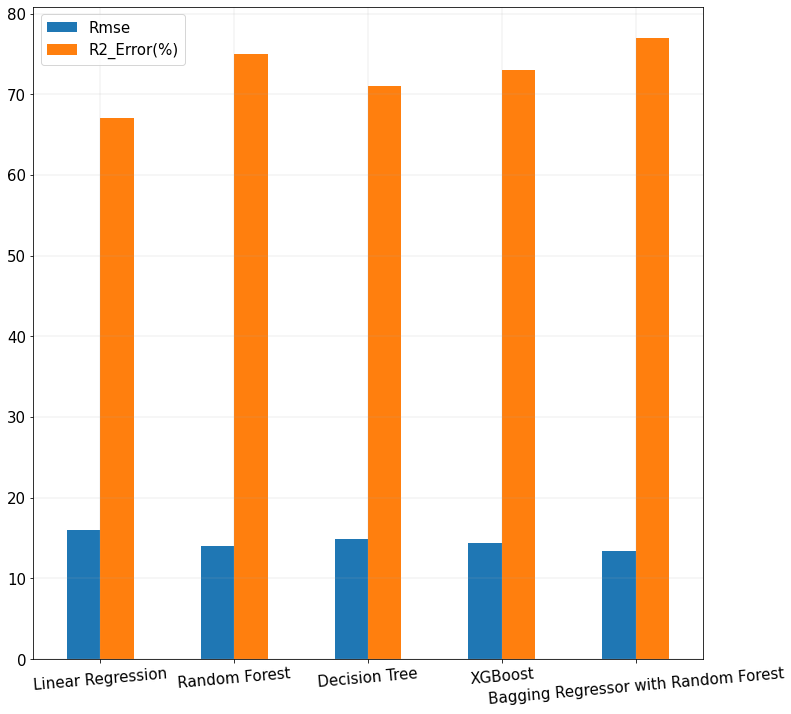

In [74]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

Algorithim = ['Linear Regression' , 'Random Forest' , 'Decision Tree' , 'XGBoost' , 'Bagging Regressor with Random Forest']
RMSE_Error = [16,14.0,14.9,14.4,13.4]
R2_Error= [67, 75, 71,73,77]
df = pd.DataFrame({'Rmse': RMSE_Error,'R2_Error(%)': R2_Error}, index=Algorithim)
ax = df.plot.bar(rot=5 ,figsize=(12, 12))
ax.grid(linewidth='0.20')


Bagging Regressor with Random Forest performs best on training data

**PREDICTIONS**
First we need to get the X_test ready

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#call StandardScaler.
X_test_Std=scaler.fit_transform(X_test_new)#fit transform
X_test_Std

array([[ 1.2383677 , -1.3398595 , -2.08980198],
       [ 1.09584232, -1.56788474, -0.66052579],
       [ 0.54976196, -0.53256517,  0.62089424],
       [ 0.25029853, -0.25355292,  1.1137481 ],
       [-0.44631426, -0.45041943, -0.16767193],
       [-0.11802547,  0.89082221,  1.01517733],
       [-0.96837349,  0.44043695,  0.62089424],
       [ 1.29121418, -1.19114738,  1.01517733],
       [-0.66090302, -0.55805867,  0.62089424],
       [-1.22620029, -0.10908972, -2.08980198],
       [ 0.61862253, -1.34410841, -1.84337505],
       [-0.76339318,  0.44468586,  1.1137481 ],
       [-0.33421565, -0.59063371,  0.12804038],
       [ 0.37520841,  0.88657329,  0.62089424],
       [-1.02282139,  1.88790152,  0.62089424],
       [ 0.06773794,  0.5027544 ,  0.62089424],
       [ 0.37680982, -0.82857309, -0.56195502],
       [-1.93242153, -0.0071157 ,  0.62089424],
       [-0.31019452,  0.70245353,  0.62089424],
       [-1.18936789,  0.57923492,  0.62089424],
       [ 0.78036481,  1.01545712,  0.620

In [76]:
X_test_final = pd.DataFrame(X_test_Std , columns = X_train_new.columns)
X_test_final

,RM,LSTAT,PTRATIO
0,1.238368,-1.339859,-2.089802
1,1.095842,-1.567885,-0.660526
2,0.549762,-0.532565,0.620894
3,0.250299,-0.253553,1.113748
4,-0.446314,-0.450419,-0.167672
...,...,...,...
92,0.735525,1.305800,0.620894
93,-0.298985,0.569321,0.571609
94,-0.375852,-1.058015,1.015177
95,0.508125,-1.154323,0.078755


In [77]:
X_test_final.shape

(97, 3)

**Linear Regression**

In [105]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_final, y_train)

prediction = model.predict(X_test_final)


root_mean_squared_error = mean_squared_error(y_test ,prediction , squared=False)# it is actually root_mean_square_error
print('Root_mean_squared_error of linear regression is' , root_mean_squared_error)

from sklearn.metrics import r2_score
r2_error = r2_score(y_test ,prediction)
print('R2_error of linear regression is' , r2_error)

Root_mean_squared_error of linear regression is 17.234911081069313
R2_error of linear regression is 0.6370960294178294


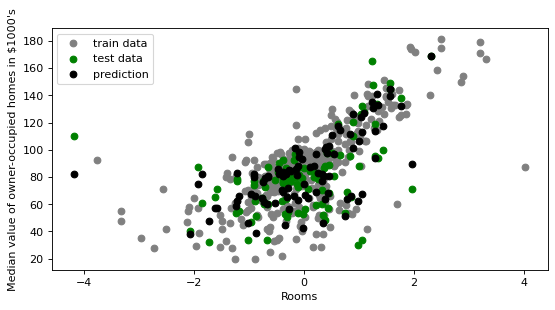

In [156]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')

font = {'size'   : 10}
matplotlib.rc('font', **font)

plt_train=plt.scatter(X_train_final["RM"],y_train,   color='grey')
plt_test=plt.scatter(X_test_final["RM"],y_test,   color='green')
plt_pred=plt.scatter(X_test_final["RM"], prediction,  color='black')

plt.xlabel("Rooms")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()


Looking at the graph above, it seems that model does a decent job of predicting the prices for rooms.

**Random Forest**

In [107]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train_final, y_train)
prediction = model.predict(X_test_final)

from sklearn.metrics import mean_squared_error
root_mean_squared_error = mean_squared_error(y_test ,prediction , squared=False)
print('Root_mean_squared_error of random forest is ' , root_mean_squared_error)


from sklearn.metrics import r2_score
r2_error = r2_score(y_test ,prediction)

print('R2_error of random forest is :' , r2_error )


Root_mean_squared_error of random forest is  14.252195905598686
R2_error of random forest is : 0.7518369075465392


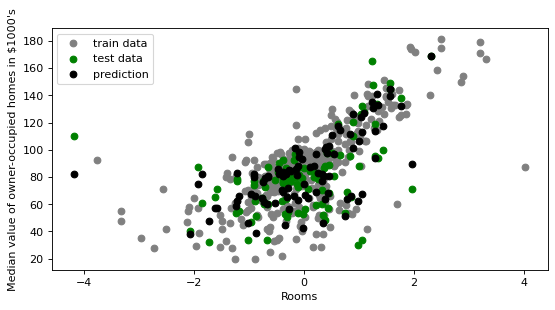

In [157]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8 , 4), dpi=80, facecolor='w', edgecolor='k')

font = {'size'   : 10}
matplotlib.rc('font', **font)

plt_train=plt.scatter(X_train_final["RM"],y_train,   color='grey')
plt_test=plt.scatter(X_test_final["RM"],y_test,   color='green')
plt_pred=plt.scatter(X_test_final["RM"], prediction,  color='black')



plt.xlabel("Rooms")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()



In [ ]:
Looking at the graph above, it seems that model does a better job thano linear regression model of predicting the prices for rooms.

**Decision Tree**

In [109]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4, random_state= 42)
model.fit(X_train_final, y_train)
prediction = model.predict(X_test_final)

from sklearn.metrics import mean_squared_error
root_mean_squared_error = mean_squared_error(y_test ,prediction , squared=False)
print('Root_mean_squared_error of decision tree is ' , root_mean_squared_error)


from sklearn.metrics import r2_score
r2_error = r2_score(y_test ,prediction)

print('R2_error of decision tree is :' , r2_error )

Root_mean_squared_error of decision tree is  19.131307313047962
R2_error of decision tree is : 0.5528400266085606


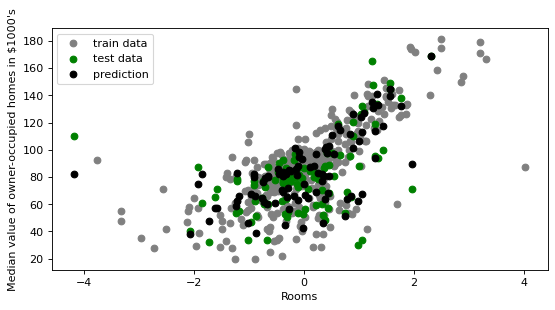

In [154]:
from matplotlib.pyplot import figure

figure(num=None, figsize=( 8 , 4), dpi=80, facecolor='w', edgecolor='k')

font = {'size'   : 10}
matplotlib.rc('font', **font)

plt_train=plt.scatter(X_train_final["RM"],y_train,   color='grey')
plt_test=plt.scatter(X_test_final["RM"],y_test,   color='green')
plt_pred=plt.scatter(X_test_final["RM"], prediction,  color='black')



plt.xlabel("Rooms")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()


In [ ]:
Looking at the graph above, it seems that model does a decent job of predicting the prices for rooms.

**XGBoost**

In [111]:
model = xgboost.XGBRegressor(max_depth=1, learning_rate = 1, n_estimators = 20 , random_state= 42)
model.fit(X_train_final, y_train)
prediction = model.predict(X_test_final)

from sklearn.metrics import mean_squared_error
root_mean_squared_error = mean_squared_error(y_test ,prediction , squared=False)
print('Root_mean_squared_error of XGBoost is ' , root_mean_squared_error)


from sklearn.metrics import r2_score
r2_error = r2_score(y_test ,prediction)

print('R2_error of XGBoost is :' , r2_error )

Root_mean_squared_error of XGBoost is  17.53250382483035
R2_error of XGBoost is : 0.6244554097746047


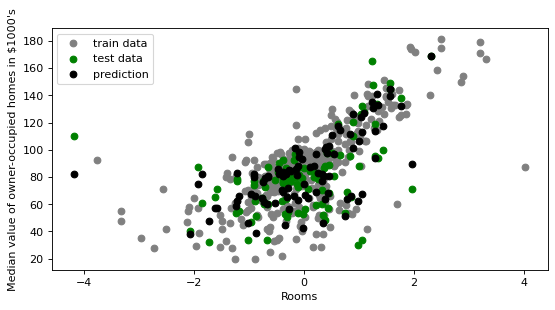

In [158]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8 , 4), dpi=80, facecolor='w', edgecolor='k')

font = {'size'   : 10}
matplotlib.rc('font', **font)

plt_train=plt.scatter(X_train_final["RM"],y_train,   color='grey')
plt_test=plt.scatter(X_test_final["RM"],y_test,   color='green')
plt_pred=plt.scatter(X_test_final["RM"], prediction,  color='black')



plt.xlabel("Rooms")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()


In [ ]:
Looking at the graph above, it seems that model does a good job of predicting the prices for rooms.

**Adaptive Boosting  with Random forest**

In [113]:
import warnings
warnings.filterwarnings('ignore')

model = BaggingRegressor(RandomForestRegressor(random_state=42), bootstrap= True, n_estimators = 10 , random_state= 42)
model.fit(X_train_final, y_train)
prediction = model.predict(X_test_final)

from sklearn.metrics import mean_squared_error
root_mean_squared_error = mean_squared_error(y_test ,prediction , squared=False)
print('Root_mean_squared_error of XGBoost is ' , root_mean_squared_error)


from sklearn.metrics import r2_score
r2_error = r2_score(y_test ,prediction)

print('R2_error of XGBoost is :' , r2_error )

Root_mean_squared_error of XGBoost is  13.886384775482716
R2_error of XGBoost is : 0.7644126237618014


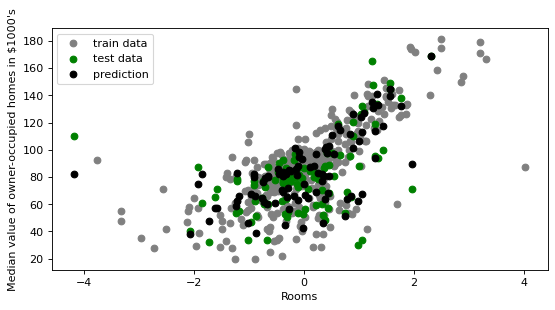

In [117]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')

font = {'size'   : 10}
matplotlib.rc('font', **font)

plt_train=plt.scatter(X_train_final["RM"],y_train,   color='grey')
plt_test=plt.scatter(X_test_final["RM"],y_test,   color='green')
plt_pred=plt.scatter(X_test_final["RM"], prediction,  color='black')



plt.xlabel("Rooms")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()


In [ ]:
Looking at the graph above, it seems that model does a a very good job of predicting the prices for rooms. 

**SUMMARIZING THE FINDINGS**

In [230]:
Predecistions_results  = pd.DataFrame({'Algorithim': ['Linear Regression' , 'Random Forest' , 'Decision Tree' , 'XGBoost' , 'Bagging Regressor with Random Forest'], 'RMSE_Error': [18.8,16.4,17.3,15.5,15.7], 'R2_Error(%)': [69.6, 76.8, 74.2,79.4,78.9]})
Predecistions_results 

,Algorithim,RMSE_Error,R2_Error(%)
0,Linear Regression,18.8,69.6
1,Random Forest,16.4,76.8
2,Decision Tree,17.3,74.2
3,XGBoost,15.5,79.4
4,Bagging Regressor with Random Forest,15.7,78.9


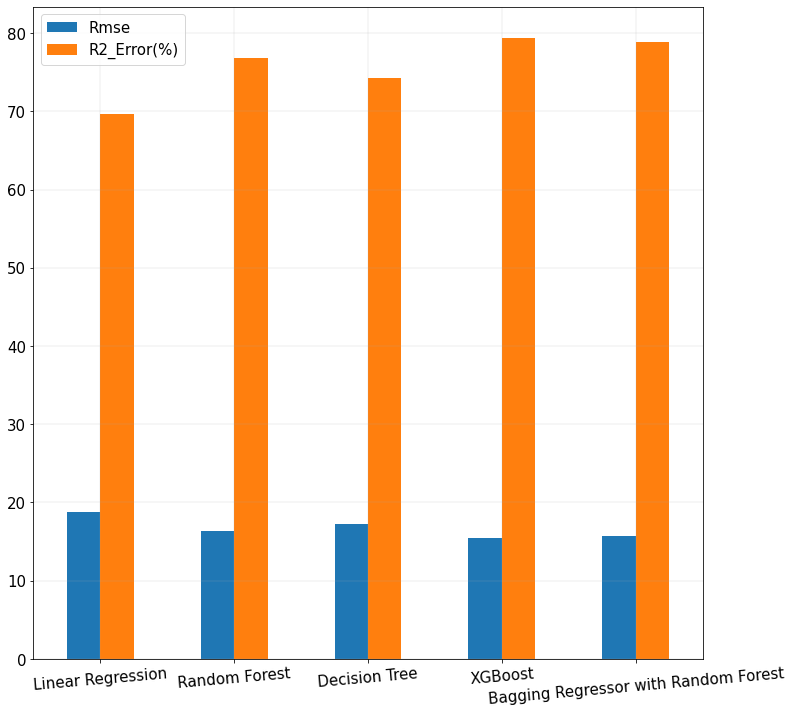

In [231]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

Algorithim = ['Linear Regression' , 'Random Forest' , 'Decision Tree' , 'XGBoost' , 'Bagging Regressor with Random Forest']
RMSE_Error = [18.8,16.4,17.3,15.5,15.7]
R2_Error= [69.6, 76.8, 74.2,79.4,78.9]
df = pd.DataFrame({'Rmse': RMSE_Error,'R2_Error(%)': R2_Error}, index=Algorithim)
ax = df.plot.bar(rot=5 ,figsize=(12, 12))
ax.grid(linewidth='0.20')

XGBoost performs the best in making predictions.

CONCLUSIONS:
    - Inflation has been taken into account the prices of houses have been adjusted.
    - Of all the imputation methods, knn works the best method for this dataset, hence it has been used for imputation.
   - Using feature engineering the number of features were reduced to three namely, PTRATIO, LSTAT, and RM
    - XGBoost performs the best in making predictions with an RMSE error of 15.5 and R2 error of 79.4.
   